# K-Nearest Neighboring Regression vs LINEAR REGRESSION 


<h2>Must Read</h2>

regarding **`Model Complexity and Overfitting`**: https://vitalflux.com/model-complexity-overfitting-in-machine-learning/

# Import Libaries

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib notebook
%matplotlib inline

# Create Data

<h4> Parameters Details </h4>

`n_samplesint, default=100`
The number of samples.

`n_featuresint, default=100`
The number of features.

`n_informativeint, default=10`
The number of informative features, i.e., the number of features used to build the linear model used to generate the output.

In [16]:
from sklearn.datasets import make_regression

X_R1, y_R1 = make_regression(n_samples =100, n_features = 1, 
                              n_informative = 1, bias = 150.0,
                              noise = 30, random_state = 0)

In [17]:
print ("first 10 feature values of X_R1:", "\n", X_R1[:10])

print ("first 10 target values of y_R1:", "\n", y_R1[:10])

first 10 feature values of X_R1: 
 [[-0.35955316]
 [ 0.97663904]
 [ 0.40234164]
 [-0.81314628]
 [-0.88778575]
 [ 0.44386323]
 [-0.97727788]
 [ 0.42833187]
 [ 0.20827498]
 [-0.31155253]]
first 10 target values of y_R1: 
 [120.61202772 131.22864089 150.56377656 169.90502386 118.15657878
 196.359452    63.87424131 166.52111726 196.69750568 109.35202873]


# Data Splitting Train and Test

Bydefault = train / test = 75/25 or we can mention `test_size = 20`

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

# KNN Regression Model and Result

In [19]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 7).fit(X_train, y_train)
y_predict_knn = knnreg.predict(X_test)


print("KNN Regression:")
print("Predicted result of KNN Regression:", "\n", y_predict_knn)
print("--------------------------------------------------------------------")

print("R-Squared-Score of training data : {:.3f}".format(knnreg.score(X_train, y_train)))
print("R-Squared-Score of testing data : {:.3f}".format(knnreg.score(X_test, y_test)))

KNN Regression:
Predicted result of KNN Regression: 
 [229.83616151 143.50734518 152.67940798 152.67940798  66.93800749
 160.74124212 131.57264596 225.61957826 190.0981514   89.82906728
 187.70772239 133.53618491 225.61957826 143.50734518 152.67940798
 108.44141828 145.28507158 183.65023724 154.04043257 167.22755144
 229.83616151 205.72441557 118.75913051 128.67927018 143.76356025]
--------------------------------------------------------------------
R-Squared-Score of training data : 0.720
R-Squared-Score of testing data : 0.471


# VIsualization

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.8/site-packages/matplotlib/pyplot.py'>

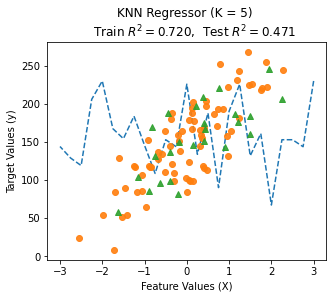

In [20]:
def knnplot():
    plt.figure(figsize = (5,4))
    X_predict_input = np.linspace(3, -3, 25).reshape(-1, 1)

    K=5
    plt.plot(X_predict_input, y_predict_knn, '--') 
    plt.plot(X_train, y_train,'o', alpha = 0.9, label = 'Train')
    plt.plot(X_test, y_test, '^', alpha = 0.9, label = 'Test')
    plt.xlabel("Input Feature")
    plt.ylabel("Target Values")
    plt.title("KNN Regressor (K = {}) \n\
    Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$"
                      .format(K, knnreg.score(X_train, y_train), knnreg.score(X_test, y_test)))

    plt.xlabel("Feature Values (X)")
    plt.ylabel("Target Values (y)")
    return plt

knnplot()

# Linear Regression Model and Result

In [21]:
from sklearn.linear_model import LinearRegression

linearReg = LinearRegression().fit(X_train, y_train)
y_predict_linear = linearReg.predict(X_test)

print("Linear Regression:")
print("Predicted result of Linear Regression:", "\n", y_predict_linear)
print("--------------------------------------------------------------------")
print("linear model intercept/bias (b) : {}".format(linearReg.intercept_))
print("linear model coeffecient/weight (w) : {}".format(linearReg.coef_))
print("  note: two different coefficents for two different features")
print("R-Squared-Score of training data : {:.3f}".format(linearReg.score(X_train, y_train)))
print("R-Squared-Score of testing data : {:.3f}".format(linearReg.score(X_test, y_test)))


Linear Regression:
Predicted result of Linear Regression: 
 [237.61316983 130.74154636 166.8362687  166.82016654  73.9314987
 155.59226231 140.22162228 216.73817253 200.52628282  95.18826352
 189.62136529 119.45171223 216.47183342 130.08086731 168.02424842
 107.51513689 128.42194459 183.23180206 165.73107237 157.96573291
 250.87407884 203.40497884 111.27789022 114.52235174 139.06823497]
--------------------------------------------------------------------
linear model intercept/bias (b) : 148.44575345658873
linear model coeffecient/weight (w) : [45.70870465]
  note: two different coefficents for two different features
R-Squared-Score of training data : 0.679
R-Squared-Score of testing data : 0.492


# Visualization

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.8/site-packages/matplotlib/pyplot.py'>

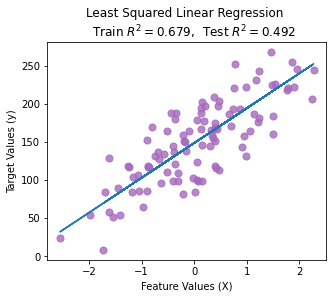

In [22]:
def linearplot():
    plt.figure(figsize = (5,4))
    plt.scatter (X_R1, y_R1, marker = 'o', s = 50, alpha = 0.8, color ="#A569BD")
    plt.plot(X_R1, linearReg.coef_ * X_R1 + linearReg.intercept_) # X = X_R1 , y = mx + c
    plt.title("Least Squared Linear Regression \n\
    Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$"
                      .format(linearReg.score(X_train, y_train), linearReg.score(X_test, y_test)))
    plt.xlabel("Feature Values (X)")
    plt.ylabel("Target Values (y)")
    return plt
linearplot()

# KNN Regression vs Linear Regression

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.8/site-packages/matplotlib/pyplot.py'>

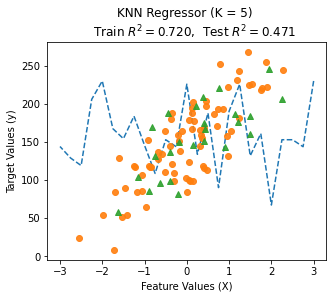

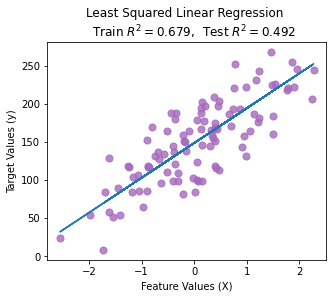

In [23]:
knnplot()
linearplot()


# Ridge Regression

1. Ridge is based on least squared linear regression
2. A penalty has been added for the large variation of weight
3. This penalty has known as regularization which prevents overfitting and reduce model complexity.
**`Model Complexity`**: It raises when a dataset has lot of features / non-linear relationship for regression model. It **captures lot of variation** and has **proned to be overfitted**

4. Ridge uses L-2 Regularization. Minimizes the sum of square of weight
5. Higher the **Alpha** value lower the weight value. Hence it reduces weight variation

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%matplotlib notebook


# Load Crime Dataset 

In [25]:
# Communities and Crime dataset
from adspy_shared_utilities import load_crime_dataset

(X_crime, y_crime) = load_crime_dataset()

In [26]:
X_crime.head(3)

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85
0,11980,3.10,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,...,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14
1,23123,2.82,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,...,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12
2,29344,2.43,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,...,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85


In [84]:
#X_crime.info()

In [27]:
y_crime

0        41.02
1       127.56
2       218.59
3       306.64
5       442.95
         ...  
2210    545.75
2211    124.10
2212    353.83
2213    691.17
2214    918.89
Name: ViolentCrimesPerPop, Length: 1994, dtype: float64

<h3> Sring to Numerical </h3>

In [68]:
#from sklearn.preprocessing import LabelEncoder
  
#crime = crime.apply(LabelEncoder().fit_transform)

#crime.head(3)

In [28]:
print("shape of features:", X_crime.shape)
print("shape of target:", y_crime.shape)

shape of features: (1994, 88)
shape of target: (1994,)


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)

# Ridge Regression

In [30]:
from sklearn.linear_model import Ridge

linridge = Ridge(alpha = 20.0).fit(X_train, y_train)
y_predict_ridge = linridge.predict(X_test)
print("Ridge Regressor:")
print("Predicted Value(1st 10 values):", "\n", y_predict_ridge[0:10])
print("-----------------------------------------------------------------------------------")

print("ridge linear model intercept/bias (b) : {}".format(linridge.intercept_))
print("ridge linear model coeffecient/weight (w) : {}".format(linridge.coef_))
print("  note: two different coefficents for two different features")
print("R-Squared-Score of training data : {:.3f}".format(linridge.score(X_train, y_train)))
print("R-Squared-Score of testing data : {:.3f}".format(linridge.score(X_test, y_test)))

print("###################################")
print("Number of non-zero features: {}".format(np.sum(linridge.coef_ != 0)))

Ridge Regressor:
Predicted Value(1st 10 values): 
 [ 390.20489113 1472.81013889  561.02108394 1030.74512662  578.88435232
   34.60801068  218.08618645  230.65733714  373.42684276  626.48040431]
-----------------------------------------------------------------------------------
ridge linear model intercept/bias (b) : -3352.4230358458803
ridge linear model coeffecient/weight (w) : [ 1.95091438e-03  2.19322667e+01  9.56286607e+00 -3.59178973e+01
  6.36465325e+00 -1.96885471e+01 -2.80715856e-03  1.66254486e+00
 -6.61426604e-03 -6.95450680e+00  1.71944731e+01 -5.62819154e+00
  8.83525114e+00  6.79085746e-01 -7.33614221e+00  6.70389803e-03
  9.78505502e-04  5.01202169e-03 -4.89870524e+00 -1.79270062e+01
  9.17572382e+00 -1.24454193e+00  1.21845360e+00  1.03233089e+01
 -3.78037278e+00 -3.73428973e+00  4.74595305e+00  8.42696855e+00
  3.09250005e+01  1.18644167e+01 -2.05183675e+00 -3.82210450e+01
  1.85081589e+01  1.52510829e+00 -2.20086608e+01  2.46283912e+00
  3.29328703e-01  4.02228467e+00 

# Ridge Regression After Performing feature normalization
<h4> Feature Scaling/Normalization </h4>

1. A technique to normalize different values of different feature value within the range of (0 to 1)
2. To get optimistic result
3. Different type of Scaler (MinMaxScaler(), MaxAbsScaler(), StandardScaler(), RobustScaler()). Most commonly used : **`MinMaxScaler()`**
4. fit and transform training dataset. whereas only transform fof testing dataset. We don't perform **fit** for testing dataset to avoid data leakage
5. Use same scaler method for training and testing
6. After perform scaling, it's hard to interpet the dataset

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import Ridge

linScaledRidge = Ridge(alpha = 20.0).fit(X_train_scaled, y_train)

y_predict_ridge = linScaledRidge.predict(X_test_scaled)
print("Ridge linear model with feature scaling(MinMaxScaler():")
print("Predicted Value(1st 10 values):\n {}".format(y_predict_ridge[0:10]))
print("-------------------------------------------------------------------------------------------------------------------------------------")

print("ridge linear model with feature scaling(MinMaxScaler()) intercept/bias (b) : {}".format(linScaledRidge.intercept_))
print("ridge linear model with feature scaling(MinMaxScaler()) coeffecient/weight (w) : \n {}".format(linScaledRidge.coef_))
print("  note: two different coefficents for two different features")
print("R-Squared-Score of training data : {:.3f}".format(linScaledRidge.score(X_train_scaled, y_train)))
print("R-Squared-Score of testing data : {:.3f}".format(linScaledRidge.score(X_test_scaled, y_test)))

print("###################################")
print("Number of non-zero features: {}".format(np.sum(linScaledRidge.coef_ != 0)))

Ridge linear model with feature scaling(MinMaxScaler():
Predicted Value(1st 10 values):
 [ 445.9000438  1354.15068104  588.59050141 1065.02610611  747.18046081
  124.40335313  238.06948883  164.70782636  459.12799996  536.21079091]
-------------------------------------------------------------------------------------------------------------------------------------
ridge linear model with feature scaling(MinMaxScaler()) intercept/bias (b) : 933.3906385044143
ridge linear model with feature scaling(MinMaxScaler()) coeffecient/weight (w) : 
 [  88.68827454   16.48947987  -50.30285445  -82.90507574  -65.89507244
   -2.27674244   87.74108514  150.94862182   18.8802613   -31.05554992
  -43.13536109 -189.44266328   -4.52658099  107.97866804  -76.53358414
    2.86032762   34.95230077   90.13523036   52.46428263  -62.10898424
  115.01780357    2.66942023    6.94331369   -5.66646499 -101.55269144
  -36.9087526    -8.7053343    29.11999068  171.25963057   99.36919476
   75.06611841  123.63522539  

# Ridge with varying alpha

In [32]:
print("Effect of varying Alpha Regulization parameter")
for alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linRidge = Ridge( alpha = alpha).fit(X_train_scaled, y_train)
    r2_train_score = linRidge.score(X_train_scaled, y_train)
    r2_test_score = linRidge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linRidge.coef_) > 1.0)
    print("Alpha = {:.2f} \n\
    num abs(coeff) > 1.0 : {}, \
    r-squared training: {:.2f}, r-squared test: {:.2f} \n"
          .format(alpha, num_coeff_bigger, r2_train_score, r2_test_score))


Effect of varying Alpha Regulization parameter
Alpha = 0.00 
    num abs(coeff) > 1.0 : 88,     r-squared training: 0.67, r-squared test: 0.50 

Alpha = 1.00 
    num abs(coeff) > 1.0 : 87,     r-squared training: 0.66, r-squared test: 0.56 

Alpha = 10.00 
    num abs(coeff) > 1.0 : 87,     r-squared training: 0.63, r-squared test: 0.59 

Alpha = 20.00 
    num abs(coeff) > 1.0 : 88,     r-squared training: 0.61, r-squared test: 0.60 

Alpha = 50.00 
    num abs(coeff) > 1.0 : 86,     r-squared training: 0.58, r-squared test: 0.58 

Alpha = 100.00 
    num abs(coeff) > 1.0 : 87,     r-squared training: 0.55, r-squared test: 0.55 

Alpha = 1000.00 
    num abs(coeff) > 1.0 : 84,     r-squared training: 0.31, r-squared test: 0.30 



# Lasso Regression 

In [33]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0) #by default train/test 75/25

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

linLasso = Lasso(alpha = 2.0, max_iter = 1000).fit(X_train_scaled, y_train)

print("Crime Dataset")
print('lasso regression linear_model_intercept: {}'.format(linLasso.intercept_))
print('lasso regression linear_model_coefficient: \n {}'.format(linLasso.coef_))
print('Non zero features: {}'.format(np.sum(linLasso.coef_ != 0)))
print('R2_scored_train: {}'.format(linLasso.score(X_train_scaled, y_train)))
print('R2_scored_test: {}'.format(linLasso.score(X_test_scaled, y_test)))

print('feature with non-zero weight sorted by abs magnitude:')

for e in sorted (list(zip(list(X_crime), linLasso.coef_)), key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:3f}'.format(e[0], e[1]))


Crime Dataset
lasso regression linear_model_intercept: 1186.6120619985784
lasso regression linear_model_coefficient: 
 [    0.             0.            -0.          -168.18346054
    -0.            -0.             0.           119.6938194
     0.            -0.             0.          -169.67564456
    -0.             0.            -0.             0.
     0.             0.            -0.            -0.
     0.            -0.             0.             0.
   -57.52991966    -0.            -0.             0.
   259.32889226    -0.             0.             0.
     0.            -0.         -1188.7396867     -0.
    -0.            -0.          -231.42347299     0.
  1488.36512229     0.            -0.            -0.
    -0.             0.             0.             0.
     0.             0.            -0.             0.
    20.14419415     0.             0.             0.
     0.             0.           339.04468804     0.
     0.           459.53799903    -0.             0.
   122.692

# Polynominal Regression

<h2>import dataset</h2>

In [56]:
from sklearn.datasets import make_friedman1

X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7, random_state = 0)

print("X_F1 data details:", "\n", X_F1[0:3])
print("X_F1 shape:", X_F1.shape)
print("y_F1 data details:", "\n", y_F1[0:20])
print("y_F1 shape:", y_F1.shape)


X_F1 data details: 
 [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
  0.43758721]
 [0.891773   0.96366276 0.38344152 0.79172504 0.52889492 0.56804456
  0.92559664]
 [0.07103606 0.0871293  0.0202184  0.83261985 0.77815675 0.87001215
  0.97861834]]
X_F1 shape: (100, 7)
y_F1 data details: 
 [17.2134918  15.10918004 17.01522097 15.11873009 17.41823211 22.39511633
  9.63063021 16.53335167  8.22803372  9.89245745 24.20228984  9.27443963
  8.38020792  7.47437591  7.13070042 15.87877067 16.42052944 22.78057004
  6.68579564 14.26511075]
y_F1 shape: (100,)


In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, random_state = 0) #bydefault train/test 75/25

#Linear Regression

linReg = LinearRegression().fit(X_train, y_train)
print("====================================================================================================")
print("Linear Regression:")
print("Linear Model Coef (w): \n {}".format(linReg.coef_))
print("Linear Model Intercept (b): {}".format(linReg.intercept_))
print("R-squared score (training): {:.3f}".format(linReg.score(X_train, y_train)))
print("R-squared score (testing): {:.3f}".format(linReg.score(X_test, y_test)))

print("\nNow we transform original dataset by adding polynominal function with degree 2 (Quadratic)\n")
      
poly = PolynomialFeatures(degree = 2)

X_F1_poly = poly.fit_transform(X_F1)

print("====================================================================================================")
print("Linear Regression With Ploynomial Function:")
print("Shape of Original Features", X_F1.shape)
print("Shape of transfom Features(with polynomial Function)", X_F1_poly.shape)
print("Original Features:", "\n", X_F1[0:3])

print("Transform Feature after adding Polynomial Function:", "\n", X_F1_poly[0:3])


X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state = 0)

linReg_poly = LinearRegression().fit(X_train, y_train)

print("Linear Model Coef with Polynomial Function[degree-2: Quadratic] (w): \n {}".format(linReg_poly.coef_))
print("Linear Model Intercept with Polynomial Function[degree-2: Quadratic] (b): {}".format(linReg_poly.intercept_))
print("R-squared score with Polynomial Function[degree-2: Quadratic] (training): {:.3f}".format(linReg_poly.score(X_train, y_train)))
print("R-squared score with Polynomial Function[degree-2: Quadratic] (testing): {:.3f}".format(linReg_poly.score(X_test, y_test)))

print("Adding Polynomial Funcation / non-linearity increases model complexity hence overfitting. We can use Ridge Regressor with L-2 Regularization to avoid such impcat."
     )
print("====================================================================================================")
print("Linear Regression With Ploynomial Function and Ridge Regularization:")

linReg_poly_ridge = Ridge(alpha =1.0).fit(X_train, y_train) #bydefault alpha = 1.0

print("Linear Model Coef with Polynomial Function[degree-2: Quadratic] (w): \n {}".format(linReg_poly_ridge.coef_))
print("Linear Model Intercept with Polynomial Function[degree-2: Quadratic] (b): {}".format(linReg_poly_ridge.intercept_))
print("R-squared score with Polynomial Function[degree-2: Quadratic] (training): {:.3f}".format(linReg_poly_ridge.score(X_train, y_train)))
print("R-squared score with Polynomial Function[degree-2: Quadratic] (testing): {:.3f}".format(linReg_poly_ridge.score(X_test, y_test)))
      

Linear Regression:
Linear Model Coef (w): 
 [ 4.42036739  5.99661447  0.52894712 10.23751345  6.5507973  -2.02082636
 -0.32378811]
Linear Model Intercept (b): 1.5425091975373135
R-squared score (training): 0.722
R-squared score (testing): 0.722

Now we transform original dataset by adding polynominal function with degree 2 (Quadratic)

Linear Regression With Ploynomial Function:
Shape of Original Features (100, 7)
Shape of transfom Features(with polynomial Function) (100, 36)
Original Features: 
 [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
  0.43758721]
 [0.891773   0.96366276 0.38344152 0.79172504 0.52889492 0.56804456
  0.92559664]
 [0.07103606 0.0871293  0.0202184  0.83261985 0.77815675 0.87001215
  0.97861834]]
Transform Feature after adding Polynomial Function: 
 [[1.00000000e+00 5.48813504e-01 7.15189366e-01 6.02763376e-01
  5.44883183e-01 4.23654799e-01 6.45894113e-01 4.37587211e-01
  3.01196262e-01 3.92505582e-01 3.30804680e-01 2.99039249e-01
  2.3250747